# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Gathering</a></li>
<li><a href="#eda">Assassing Data</a></li>
<li><a href="#eda">Cleaning Data</a></li>
<li><a href="#eda">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusions">Insights</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. In this project, i will carry out the following task:

1. Gathering data

2. Assessing data

3. Cleaning data

4. Storing data

5. Analyzing, and visualizing data

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import tweepy 
import requests as req
import os
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read the downloaded csv fike
we_rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#download the image_predictions.tsv file programmatically
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = req.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
#Read tsv file
image = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = we_rate_dogs.tweet_id.values
len(tweet_ids)

2356

In [7]:
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids: 
#       count += 1
#      print(str(count) + ": " + str(tweet_id))
#     try:
#        tweet = api.get_status(tweet_id, tweet_mode='extended')
#       print("Success")
#            json.dump(tweet._json, outfile)
#           outfile.write('\n')
#       except tweepy.errors.HTTPException as e:
#           print("Fail")
#           fails_dict[tweet_id] = e
#           pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
tweets_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets_list.append(data)
tweet_df = pd.DataFrame(tweets_list, columns =['id', 'retweet_count', 'favorite_count'])

<a id='eda'></a>
## Assessing Data
In this section, all three gathered data are assessed and at least **eight (8) quality issues and two (2) tidiness issue** will be detected and documented using **both** virtual assessment and programmatic assessment.

### Visual assesment

In [9]:
we_rate_dogs.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1941,673715861853720576,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861...,4,10,a,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
1195,717421804990701568,NaN,NaN,2016-04-05 18:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,None,None,None,None
1009,747512671126323200,NaN,NaN,2016-06-27 19:31:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,None,None,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None,None,None,None
1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,None,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827...,11,10,None,None,None,None,None
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I present to you... Dog Jesus. ...,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
1591,686606069955735556,NaN,NaN,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/686606069...,10,10,Horace,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None


In [10]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,7015,33835
1,892177421306343426,5302,29350
2,891815181378084864,3484,22071
3,891689557279858688,7229,36961
4,891327558926688256,7768,35336
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Programmatic assessment

In [12]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
we_rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
we_rate_dogs[we_rate_dogs.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [15]:
#Checking for duplicate values
we_rate_dogs.duplicated().sum()

0

In [16]:
#checking for retweets
len(we_rate_dogs[we_rate_dogs.retweeted_status_id.isnull()==False])

181

In [17]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image.duplicated().sum()

0

In [20]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Tidiness issues
1. The columns; doggo, floofer, pupper and puppo all refer to dog stages and should be in one column..

2. Create one column for image prediction and another column for confidence level

### Quality issues
1. In the Enhanced twitter archive data, the 'timestamp' column is an incorrect datatype(string instead of datetime).

2. The 'tweet_id' column has an incorrect datatype(integer instead of string).

3. There are 181 retweets

4. Unneeded columns()

5. Invalid dog name such as '0fficially', 'the', 'as', and the.

6. Some images are not dog images 

7. Presence of underscores in mutiple names in dog_breed column instead of space.

8. Related dataset in three different tables.

<a id='eda'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
archive_copy = we_rate_dogs.copy()
image_copy = image.copy()
tweets_copy = tweet_df.copy()

### Tidiness cleaning

### Issue #1: Dog stages are seperated into four columns.

#### Define: Combine the doggo, floofer, pupper and puppo columns into one column ('dog_stage') as they all refer to stages of dog growth. Then change the resulting column into Category datatype.


#### Code

In [22]:
#create a function with if statements to capture the dog_stage
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if not stage:
        return 'None'
    else:
        return ','.join(stage) #Join for more than one stage
#Create new column 'dog_stage'
archive_copy['dog_stage'] = archive_copy.apply(lambda row: dog_stage(row), axis=1)

#Drop the doggo to puppo columns
archive_copy.drop(['doggo', 'pupper', 'floofer', 'puppo'], axis=1, inplace=True)

In [23]:
#change 'none' in the dog_stage column to NaN and those having more than one stage to 'multiple'
archive_copy['dog_stage'] = archive_copy['dog_stage'].replace('None', np.nan).astype('category')

#### Test

In [24]:
archive_copy['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

- under the dog_stage column, there seems to be some dogs with multiple stages

### Issue #2: Multiple columns for dog breeds and confidence levels

#### Define: Define a function with nested if statement to condense the p1,p2&p3 columns into one(dog_breed) and their confidence level into one.

#### Code

In [25]:
#define a function with nested if statements to get the dog_breed and confidence_level from the first 'True' prediction
dog_breed = []
confidence_level =[]

def image(image_copy):
    if image_copy['p1_dog'] == True:
        dog_breed.append(image_copy['p1'])
        confidence_level.append(image_copy['p1_conf'])
    elif image_copy['p2_dog'] == True:
        dog_breed.append(image_copy['p2'])
        confidence_level.append(image_copy['p2_conf'])
    elif image_copy['p3_dog'] == True:
        dog_breed.append(image_copy['p3'])
        confidence_level.append(image_copy['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_level.append('Error')

        
image_copy.apply(image, axis=1)

#create new columns
image_copy['dog_breed'] = dog_breed
image_copy['confidence_level'] = confidence_level

#### Test

In [26]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   p1                2075 non-null   object 
 4   p1_conf           2075 non-null   float64
 5   p1_dog            2075 non-null   bool   
 6   p2                2075 non-null   object 
 7   p2_conf           2075 non-null   float64
 8   p2_dog            2075 non-null   bool   
 9   p3                2075 non-null   object 
 10  p3_conf           2075 non-null   float64
 11  p3_dog            2075 non-null   bool   
 12  dog_breed         2075 non-null   object 
 13  confidence_level  2075 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 184.5+ KB


### Quality Cleaning

### Issue #1: Incorrect timestamp datatype

#### Define: Convert the datatype of the timestamp column from string(object) to datatime using the pandas .to_datatime() function.

#### Code

In [27]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

#### Test

In [28]:
archive_copy['timestamp'].dtype

datetime64[ns, UTC]

### Issue #2: Incorrect 'tweet_id' datatype

#### Define:  Convert the datatype of the tweet_id columns in all three datasets from integer to string using .astype() function.

#### Code

In [29]:
archive_copy['tweet_id'] = archive_copy['tweet_id'].apply(str)
image_copy['tweet_id'] = image_copy['tweet_id'].apply(str)
tweets_copy['id'] = tweets_copy['id'].apply(str)

#### Test

In [30]:
type(archive_copy['tweet_id'].iloc[0])

str

In [31]:
type(image_copy['tweet_id'].iloc[0])

str

In [32]:
type(tweets_copy['id'].iloc[0])

str

### Issue #3: Presence of retweets(118)

#### Code

In [33]:
#Drop rows that are retweet 
archive_copy.drop(archive_copy[archive_copy['retweeted_status_id'].isnull() == False].index, inplace=True)

In [34]:
#drop columns (retweeted_user_id to retweeted_timestamp)
archive_copy.drop(archive_copy.iloc[:, 6:9], axis=1, inplace=True)

#### Test

In [35]:
#Confirm that all retweeted rows and columns have been dropped
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int6

### Issue #4: Unnecessary columns(in_reply_to_status_id, in_reply_to_user_id)

#### Define: Drop columns not needed for analysis using .iloc[ ] and drop().

#### Code

In [36]:
#Drop columns in_reply_to_status_id & in_reply_to_user_id
archive_copy.drop(archive_copy.iloc[:,1:3], axis=1, inplace=True)

#### Test

In [37]:
#Confirm that the columns have been dropped
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 155.4+ KB


### Issue #5: Invalid dog name such as '0fficially', 'the', 'as', and the.

#### Define: Get a list of incorrect dog names and replace them with NaN

#### Code

In [38]:
#Get the list of invalid dog names
archive_copy[archive_copy.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [39]:
#Write a for loop to replace the invalid names with 'NaN'
invalid_names = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']
for names in invalid_names:
    archive_copy['name'].replace(names, np.nan, inplace=True)

#### Test

In [40]:
archive_copy[archive_copy.name.str.islower()==True]['name'].unique()

array([], dtype=object)

In [41]:
archive_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

### Issue #6: Some images are not dog images

#### Define: Drop rows that are not dog images and drop the associated columns.

#### Code

In [42]:
#row with non-dog images
image_copy[image_copy['dog_breed'] == 'Error']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_level
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Error,Error
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,Error,Error
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,Error,Error
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,Error,Error
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,Error,Error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False,Error,Error
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False,Error,Error
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,Error,Error
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,Error,Error


In [43]:
#Drop rows that are not images of dogs
image_copy.drop(image_copy[image_copy['dog_breed'] == 'Error'].index, inplace=True)

In [44]:
#drop columns no longer needed
image_copy.drop(image_copy.iloc[:, 2:12], axis=1, inplace=True)

#### Test

In [45]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   object
 1   jpg_url           1751 non-null   object
 2   dog_breed         1751 non-null   object
 3   confidence_level  1751 non-null   object
dtypes: object(4)
memory usage: 68.4+ KB


### Issue #7: Presence of underscores in mutiple names in dog_breed column instead of space.

#### Define: Remove underscores used to seperate multiple words name and replace them with space using the .replace() function. Then capitalize the first letter of each word using .str.title().


#### Code

In [46]:
#Replace the underscores(_) used to seperate multiple names in dog_breed columns and replaces them with spaces( )
#Capitalize first letter of each word.
image_copy['dog_breed'] = image_copy['dog_breed'].str.replace('_', ' ').str.title()

#### Test

In [47]:
image_copy['dog_breed']

0         Welsh Springer Spaniel
1                        Redbone
2                German Shepherd
3            Rhodesian Ridgeback
4             Miniature Pinscher
                  ...           
2069    Chesapeake Bay Retriever
2070                      Basset
2071          Labrador Retriever
2072                   Chihuahua
2073                   Chihuahua
Name: dog_breed, Length: 1751, dtype: object

### Issue #8: The three dataset should be merged into one

#### Define: Merge the three dataset

#### Code

In [48]:
#change the tweet dataset 'id' column to 'tweet_id'
tweets_copy.columns = ['tweet_id', 'retweet_count', 'favorite_count']

In [49]:
#merge archive_copy and tweets_copy on tweet_id column (left join) using merge function
twitter_archive_clean = pd.merge(archive_copy, tweets_copy , how = 'left' , on = 'tweet_id')

In [50]:
#merge `twitter_archive_clean` and `image_copy` on tweet_id column (inner join) using merge function
# and make master dataset
merged_dataset = pd.merge(twitter_archive_clean, image_copy , how = 'inner' , on = 'tweet_id')

In [51]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   expanded_urls       1686 non-null   object             
 5   rating_numerator    1686 non-null   int64              
 6   rating_denominator  1686 non-null   int64              
 7   name                1606 non-null   object             
 8   dog_stage           260 non-null    category           
 9   retweet_count       1678 non-null   float64            
 10  favorite_count      1678 non-null   float64            
 11  jpg_url             1686 non-null   object             
 12  dog_breed           1686 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
#save the merged dataset to a csv file
merged_dataset.to_csv('twitter_archive_master.csv')

<a id='eda'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight #1: Which breed is most common?

In [53]:
#Top 10 common dog breeds
merged_dataset['dog_breed'].value_counts()[:10] / len(merged_dataset)

Golden Retriever      0.093713
Labrador Retriever    0.064057
Pembroke              0.056346
Chihuahua             0.053974
Pug                   0.036773
Toy Poodle            0.030249
Chow                  0.028470
Samoyed               0.024911
Pomeranian            0.024911
Malamute              0.019573
Name: dog_breed, dtype: float64

- The Golden Retriever is the most common dog breed in this dataset. it covers 0ver 9% of the data sample sample. 


### Insight #2 and Visualization: Which dog breed was best predicted?

In [54]:
#top 10 best predicted breeds
merged_dataset.groupby(['dog_breed'])['confidence_level'].mean().nlargest(10)

dog_breed
Komondor                   0.972531
Clumber                    0.946718
Keeshond                   0.844431
Bull Mastiff               0.815618
Brittany Spaniel           0.775591
Bernese Mountain Dog       0.766685
Samoyed                    0.717440
Blenheim Spaniel           0.699588
German Shepherd            0.694426
Black-And-Tan Coonhound    0.692000
Name: confidence_level, dtype: float64

- The Komondor breed is the No1 best image prediction with cinfidence level of 0.972531, followed by Clumber and Keeshond with confidence level of 0.946718 & 0.84431 respectively.

In [55]:
#get the url for Komondor image
merged_dataset[merged_dataset['dog_breed'] == 'Komondor']['jpg_url']

83      https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg
428     https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg
1569    https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg
Name: jpg_url, dtype: object

In [56]:
#get the url for Clumber image
merged_dataset[merged_dataset['dog_breed'] == 'Clumber']['jpg_url']

499    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
Name: jpg_url, dtype: object

In [57]:
#get the url for Keeshond image
merged_dataset[merged_dataset['dog_breed'] == 'Keeshond']['jpg_url']

554     https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg
725     https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg
1159    https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg
1493    https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg
Name: jpg_url, dtype: object

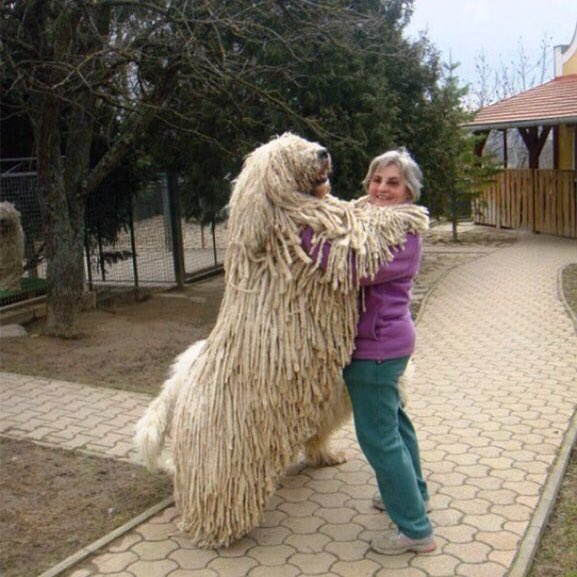

In [58]:
#display the image of the no 1 best prediction
from IPython import display
display.Image("https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg")

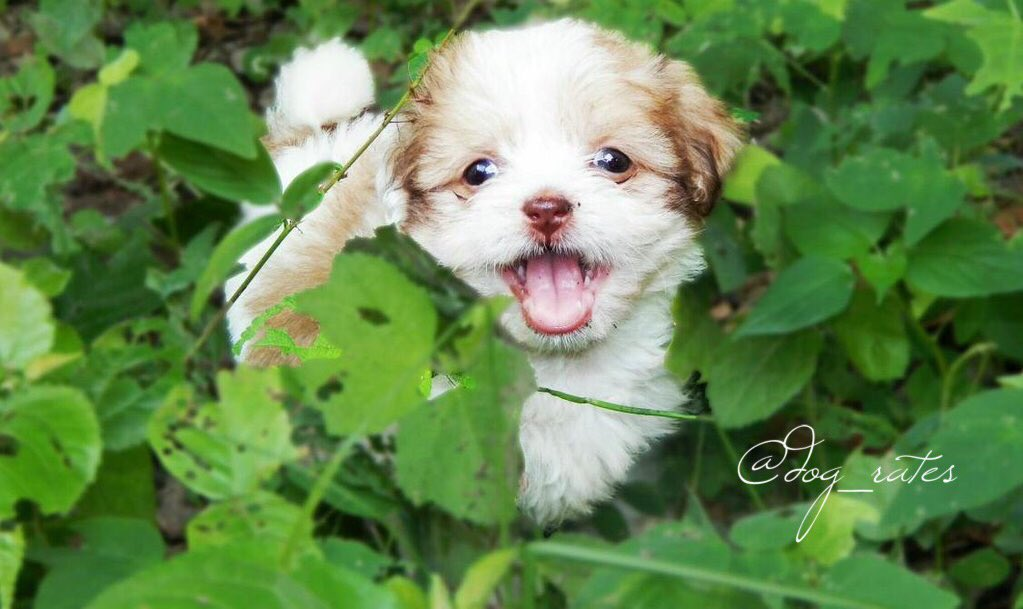

In [59]:
#display the image of no 2 best prediction
from IPython import display
display.Image("https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg")

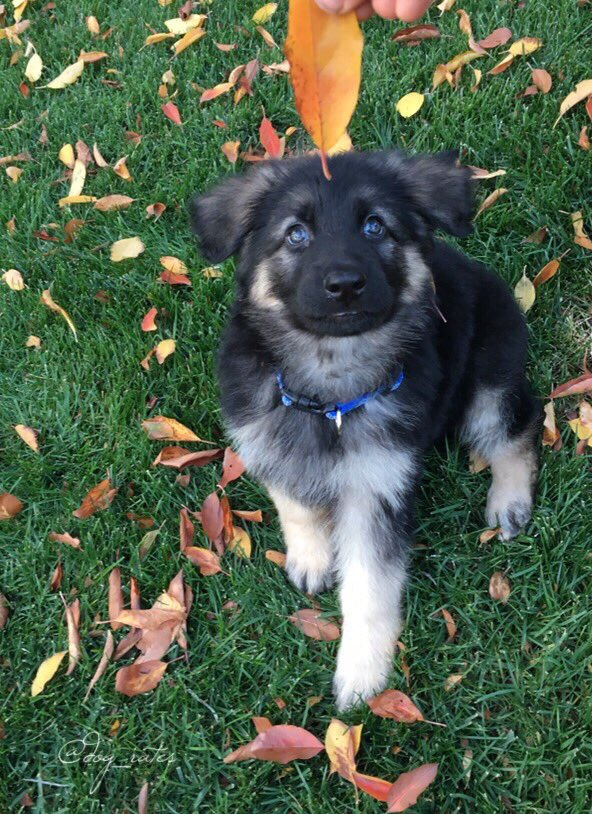

In [60]:
#display the image of the no 3 best prediction
from IPython import display
display.Image("https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg")

### Insight #3 and Visualization: What is the relationship between favorite_count and retweet_count?

Text(0.5, 1.0, 'Correlation of favorites and retweets')

<Figure size 720x576 with 0 Axes>

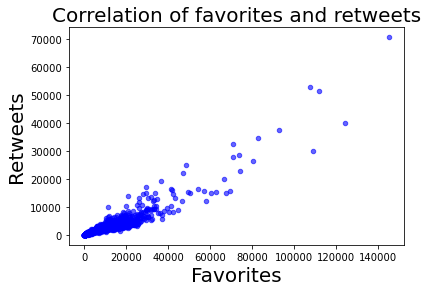

In [62]:
plt.figure(figsize=(10, 8))
merged_dataset.plot(x='favorite_count', y='retweet_count', alpha=0.6, kind='scatter', color='blue')
plt.xlabel('Favorites', fontsize=20)
plt.ylabel('Retweets', fontsize=20)
plt.title('Correlation of favorites and retweets', fontsize=20)


The scattergragh of favorites and retweets shows a positive correlation. As the favorite_counts increases, the retweets also increases.

<a id='conclusions'></a>
## Insights

1. The Golden Retriever is the most common dog breed in this dataset. it covers 0ver 9% of the data sample sample followed by the Labrador Retriever which covers over 6% of the data sample

2. The Komondor breed is the No1 best image prediction with cinfidence level of 0.972531, followed by Clumber and Keeshond with confidence level of 0.946718 & 0.84431 respectively.

3. The scattergragh of favorites and retweets shows a positive correlation. As the favorite_counts increases, the retweets also increases.